In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

from datetime import datetime,date

In [2]:
trans = pd.read_csv('Transactions_Cleaned.csv')
cust_d = pd.read_csv('Customerdemographic.csv')

In [3]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [4]:
print('Total Records(Rows) in the dataset: {}.'.format(trans.shape[0]))
print('Total Records(Columns) in the dataset: {}.'.format(trans.shape[1]))

Total Records(Rows) in the dataset: 19803.
Total Records(Columns) in the dataset: 14.


In [5]:
cust_d.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,70
3,4,Talbot,NaN,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,62
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,46


In [6]:
print('Total Records(Rows) in the dataset: {}.'.format(cust_d.shape[0]))
print('Total Records(Columns) in the dataset: {}.'.format(cust_d.shape[1]))

Total Records(Rows) in the dataset: 3912.
Total Records(Columns) in the dataset: 13.


In [7]:
merged_trans_cust = pd.merge(trans, cust_d, left_on='customer_id', right_on='customer_id', how='inner')

In [8]:
merged_trans_cust.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,45
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,45


In [9]:
print('Total Records(Rows) in the dataset: {}.'.format(merged_trans_cust.shape[0]))
print('Total Records(Columns) in the dataset: {}.'.format(merged_trans_cust.shape[1]))

Total Records(Rows) in the dataset: 19354.
Total Records(Columns) in the dataset: 26.


In [10]:
merged_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

In [11]:
merged_trans_cust['transaction_date'] = pd.to_datetime(merged_trans_cust['transaction_date'])

In [12]:
#1. RFM Analysis
#RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. 
#It groups the customers on the basis of their previous purchase transactions. 
#How recently, how often, and how much did a customer buy. 
#RFM filters customers into various groups for the purpose of better service. 
#There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? 
#Do they often purchase our product? 
#Also, It helps managers to run an effective promotional campaign for personalized service.

#Recency (R): Who have purchased recently? Number of days since last purchase (least recency)
#Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)
#Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

In [13]:
# Maximum Transaction Date or the latest transaction date.

max_trans_date = max(merged_trans_cust['transaction_date']).date()
max_trans_date

datetime.date(2017, 12, 30)

In [14]:
merged_trans_cust.tail()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
19349,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,No,22.0,48
19350,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,No,22.0,48
19351,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,No,22.0,48
19352,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,...,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,No,22.0,48
19353,18822,30,3464,2017-12-13,1.0,Approved,Solex,Standard,high,medium,...,Female,38,1982-06-09,Staff Accountant III,Financial Services,Mass Customer,N,Yes,4.0,41


In [15]:
# Taking the last transaction date as a reference date for comparision and 
# finding the number of days between a transaction date and last transaction date to compute the recency.

comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")

In [16]:
# Creating a RFM table that will contain all the values for recency , frequency and Monetray data. 

rfm_table = merged_trans_cust.groupby(['customer_id']).agg({'transaction_date': lambda date : (comparison_date - date.max()).days,
                                                            'product_id' : lambda prod_id : len(prod_id), 
                                                            'profit' : lambda p : sum(p)})

In [17]:
rfm_table.columns

Index(['transaction_date', 'product_id', 'profit'], dtype='object')

In [18]:
rfm_table.rename(columns={'transaction_date' : 'recency',
                          'product_id': 'frequency',
                          'profit': 'Monetary'}, inplace=True)

In [19]:
rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, ['1','2','3','4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['Monetary'], 4, ['1', '2', '3', '4'])

In [20]:
rfm_table

,recency,frequency,Monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
3,102,8,3362.81,1,4,3
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2
...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2
3497,52,3,1648.32,2,1,1
3498,127,6,3147.33,1,2,3


In [21]:
# Caluclation of RFM Score.
# Max weightage is given to recency then frequency and then  monetary.

rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int)+10*rfm_table['f_quartile'].astype(int)+rfm_table['m_quartile'].astype(int)

In [22]:
# Assigning a title to a cuustomer.
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.

rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])

In [23]:
rfm_table

,recency,frequency,Monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,Platinum
2,128,3,2226.26,1,1,2,112,Bronze
3,102,8,3362.81,1,4,3,143,Bronze
4,195,2,220.57,1,1,1,111,Bronze
5,16,6,2394.94,4,2,2,422,Platinum
...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,Bronze
3497,52,3,1648.32,2,1,1,211,Bronze
3498,127,6,3147.33,1,2,3,123,Bronze


In [24]:
max(rfm_table['rfm_score'])

444

In [26]:
cust_trans_rfm = pd.merge(merged_trans_cust,rfm_table,left_on="customer_id", right_on='customer_id', how ='inner')

In [29]:
cust_trans_rfm.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,Age,recency,frequency,Monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,10.0,69,75,3,645.99,2,1,1,211,Bronze
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,10.0,69,75,3,645.99,2,1,1,211,Bronze
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,10.0,69,75,3,645.99,2,1,1,211,Bronze
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,10.0,45,20,7,4179.11,3,3,4,334,Gold
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,10.0,45,20,7,4179.11,3,3,4,334,Gold


In [28]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

In [30]:
cust_trans_rfm['Age_Group'] = cust_trans_rfm['Age'].apply(lambda x: (math.floor(x/10)+1)*10)

In [31]:
#Creating a Detail Customer title / tag based on RFM Score
#An extended version of customer title is made which divides the entire number of customers into 11 groups. 
#The groups are mainly Platinum Customers, Very Loyal, Becoming Loyal, Recent Customers, Potential Customers, 
#Late Bloomer, Loosing Customers, High Risk Customers, Almost Lost Customers, Evasive Customers and Lost Customers.
#The demarkation of customers into the above mentioned groups is based on their RFM scores.

In [32]:
def cust_score_title_lkup(cols):
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [33]:
cust_trans_rfm['detail_cust_title']=cust_trans_rfm[['rfm_score']].apply(cust_score_title_lkup, axis=1)

C:\Users\mrpar\AppData\Local\Temp\ipykernel_20272\4027663716.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rfm_score = cols[0]


In [34]:
def get_ranks(cols):
    
    title = cols[0]
    
    if title == 'Platinum Customer':
        return 1
    elif title == 'Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == "Recent Customer":
        return 4
    elif title == 'Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title == 'High Risk Customer':
        return 8
    elif title == "Almost Lost Customer":
        return 9
    elif title == 'Evasive Customer':
        return 10
    else:
        return 11

In [35]:
cust_trans_rfm['rank']=cust_trans_rfm[['detail_cust_title']].apply(get_ranks, axis=1)

C:\Users\mrpar\AppData\Local\Temp\ipykernel_20272\2038440124.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  title = cols[0]


In [36]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

In [37]:
cust_trans_rfm.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,frequency,Monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,Age_Group,detail_cust_title,rank
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,7,4179.11,3,3,4,334,Gold,50,Potential Customer,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,7,4179.11,3,3,4,334,Gold,50,Potential Customer,5


In [38]:
#2. Exporting to CSV File
#After performing data quality assessment(DQA), 
#data cleaning and RFM Analysis on the dataset, 
#it's time to export the dataset to a csv file for further exploratory data analysis (EDA) and 
#this data will drive the Sales Customer Segmenation Dashboard developed in Tableau.

In [39]:
cust_trans_rfm.to_csv('Customer_Trans_RFM_Analysis.csv', index=False)

In [45]:
print('Total Records (Rows) in the Final Dataset {}'.format(cust_trans_rfm.shape[0]))
print('Total Records (Columns) in the Final Dataset {}'.format(cust_trans_rfm.shape[1]))

Total Records (Rows) in the Final Dataset 19354
Total Records (Columns) in the Final Dataset 37


In [46]:
#3. Data Analysis and Exploration
#3.1. New Customer vs Old Customer Age Distributions
#Most New / Old Customers are aged between 40-49. 
#The lowest age groups are under 20 and 80+ for both Old and New Customers dataset.
#Among the New Customers the most populated age bracket is 20-29 and 60-69, 
#while the maximum Old Customers are from the age bracket 50-69.
#here is a steep drop in number of customers in 30-39 age groupsd among the New Customers.

In [50]:
new_cust = pd.read_csv('Customer_Trans_RFM_Analysis.csv')

In [51]:
new_cust

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,frequency,Monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,Age_Group,detail_cust_title,rank
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,7,4179.11,3,3,4,334,Gold,50,Potential Customer,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,7,4179.11,3,3,4,334,Gold,50,Potential Customer,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19349,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,4,5170.51,1,1,4,114,Bronze,50,Evasive Customer,10
19350,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,4,5170.51,1,1,4,114,Bronze,50,Evasive Customer,10
19351,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,4,5170.51,1,1,4,114,Bronze,50,Evasive Customer,10
19352,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,...,4,5170.51,1,1,4,114,Bronze,50,Evasive Customer,10


C:\Users\mrpar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrpar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

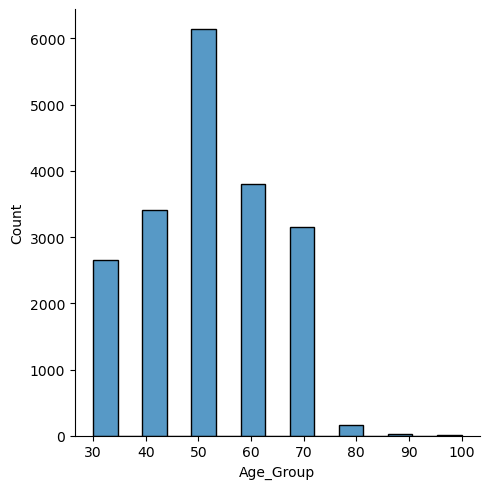

In [52]:
plt.figure(figsize=(10,8))
sns.displot(new_cust['Age_Group'], kde=False, bins =15)
plt.xlabel = ("Age Group")
plt.ylabel = ("Number of Customers")
plt.title = ("New Customers - Age Distribution")

C:\Users\mrpar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrpar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

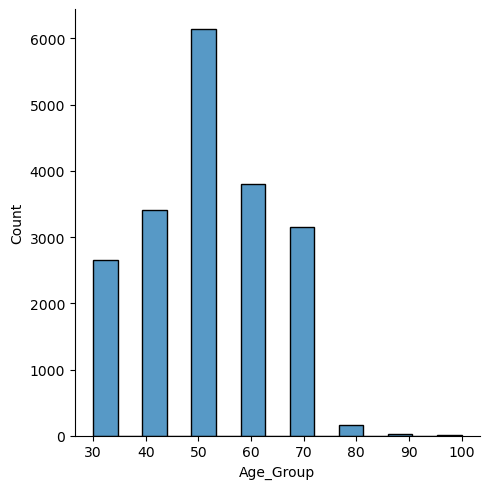

In [53]:
plt.figure(figsize=(10,8))
sns.displot(cust_trans_rfm['Age_Group'], kde=False, bins =15)
plt.xlabel = ("Age Group")
plt.ylabel = ("Number of Customers")
plt.title = ("Old Customers - Age Distribution")

In [56]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

In [54]:
#3.2. Bike related purchases over last 3 years by gender
#Over the last 3 years approximately 51% of the buyers are women and 49% were male buyers.
#Female purchases are approximately 10,000 more than male (numerically). Gender wise majority of the bike sales comes from female customers.

In [61]:
cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}).reset_index()
cust_bike_purchase_by_gender

C:\Users\mrpar\AppData\Local\Temp\ipykernel_20272\2896127985.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}).reset_index()


,gender,past_3_years_bike_related_purchases
0,Female,478488
1,Male,468943


In [60]:
total_records = cust_trans_rfm['past_3_years_bike_related_purchases'].sum()
total_records

947431

In [62]:
cust_bike_purchase_by_gender['Percent_of_total'] = (cust_bike_purchase_by_gender['past_3_years_bike_related_purchases']/total_records)*100

In [63]:
cust_bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases,Percent_of_total
0,Female,478488,50.503731
1,Male,468943,49.496269


TypeError: 'str' object is not callable

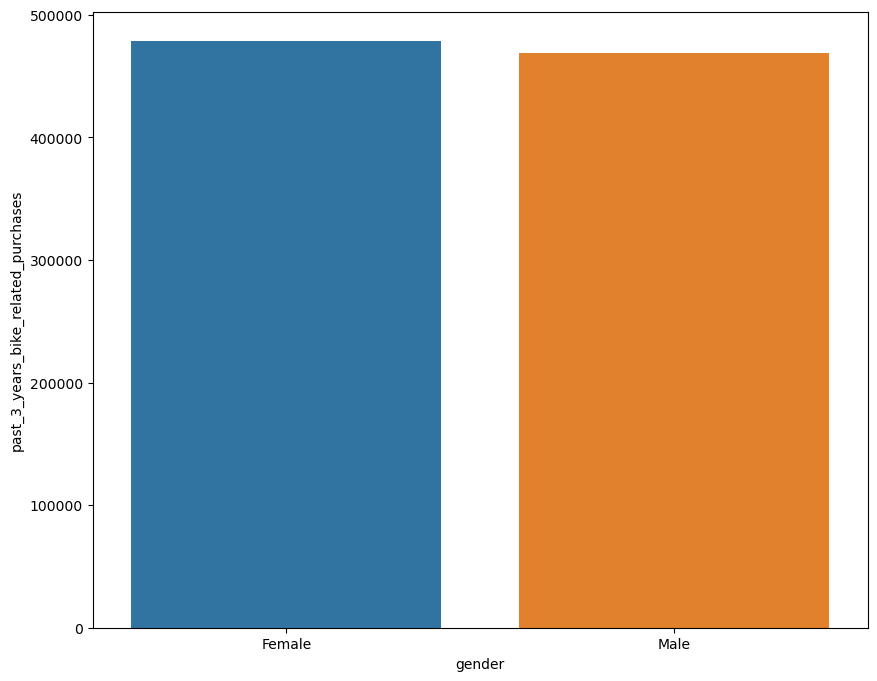

In [68]:
plt.figure(figsize=(10,8))
sns.barplot(x='gender', y='past_3_years_bike_related_purchases', data = cust_bike_purchase_by_gender)
plt.xlabel('Gender')  # Corrected placement of xlabel
plt.ylabel("Percent of Total Sales")
plt.title("Gender wise distribution of bike purchases in past 3 years")

In [69]:
#3.3 Job Industry Customer Distribution
#Among the New Customers the highest amount of sales comes from customers having a job in Manufacturing and Financial services sector. 
#The samllest chunk of sales comes from customers in Agriculture sector and from Telecom sector with 3% sales only. 
#Similar trend is observed among Old Customers.

TypeError: 'str' object is not callable

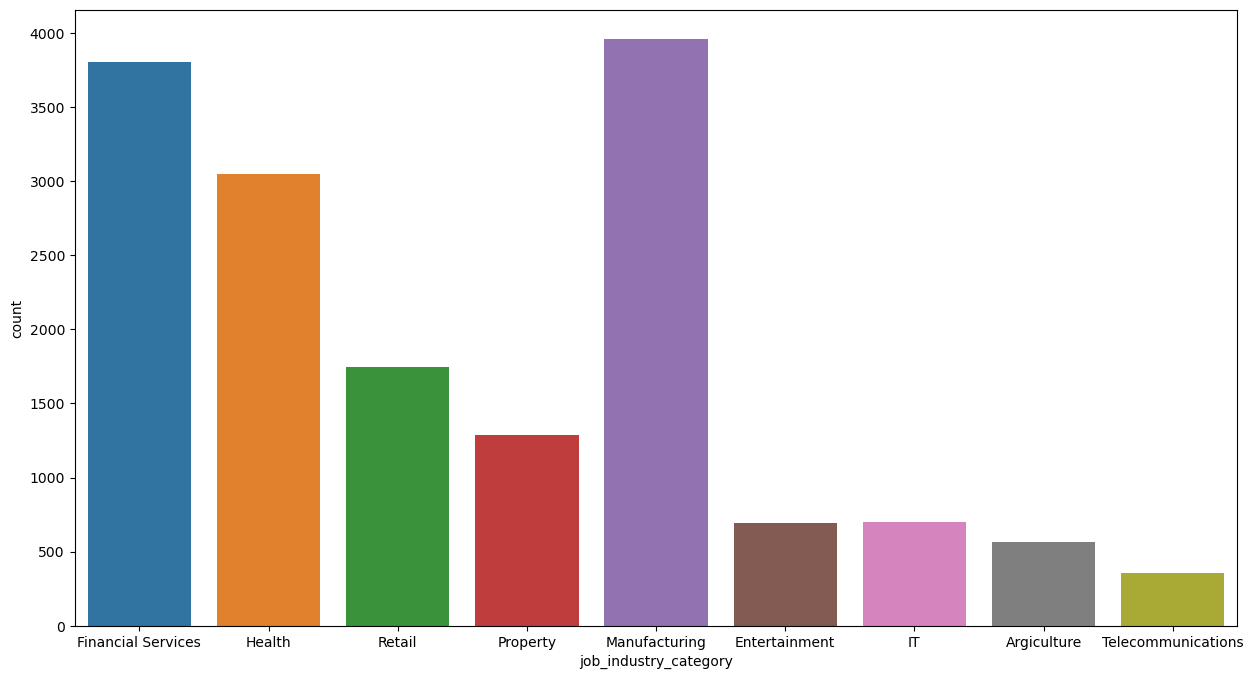

In [72]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=new_cust[~(new_cust['job_industry_category'] == 'Missing')])
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('New Customers - Job Industry Customer Distribution')

plt.show()

TypeError: 'str' object is not callable

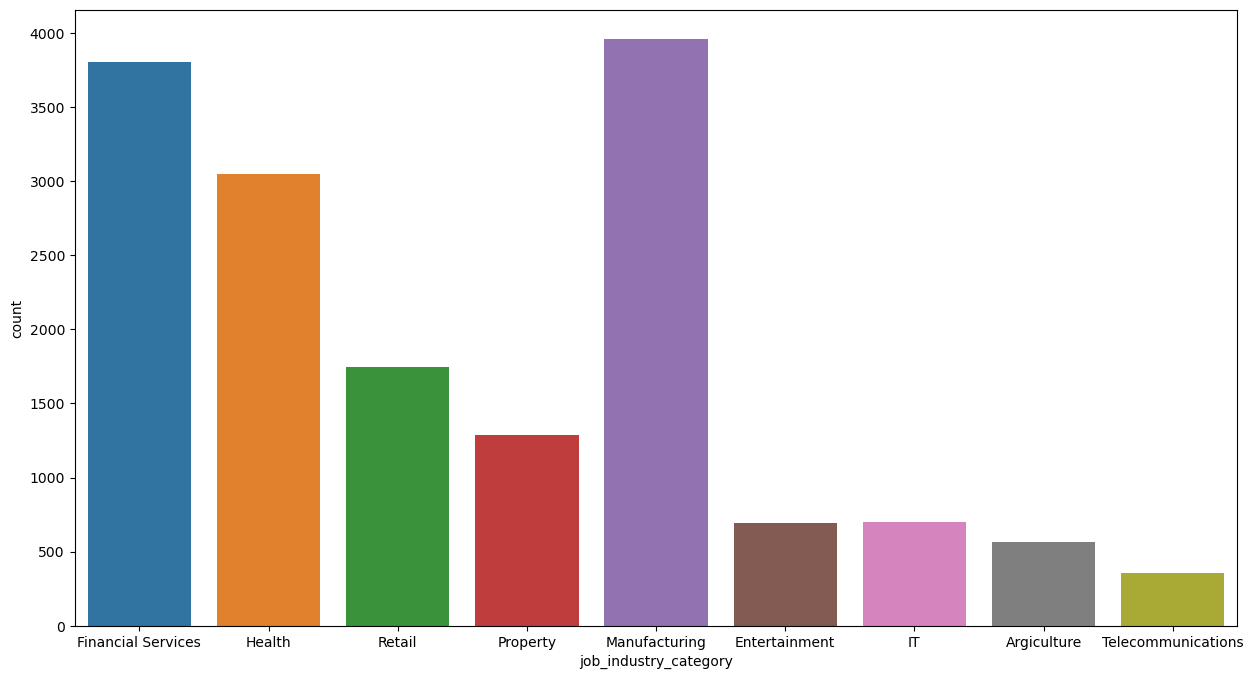

In [73]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=cust_trans_rfm[~(cust_trans_rfm['job_industry_category']=='Missing')])
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Job Industry Customer Distribution')

plt.show()

In [76]:
wealth_age_seg_new = new_cust.groupby(['wealth_segment', 'Age_Group']).size().reset_index()

In [77]:
wealth_age_seg_new.rename(columns={0:'Number of Customers'}, inplace=True)
wealth_age_seg_new

,wealth_segment,Age_Group,Number of Customers
0,Affluent Customer,30,767
1,Affluent Customer,40,811
2,Affluent Customer,50,1411
3,Affluent Customer,60,936
4,Affluent Customer,70,743
5,Affluent Customer,80,37
6,Affluent Customer,90,5
7,Affluent Customer,100,10
8,High Net Worth,30,577
9,High Net Worth,40,919


TypeError: 'str' object is not callable

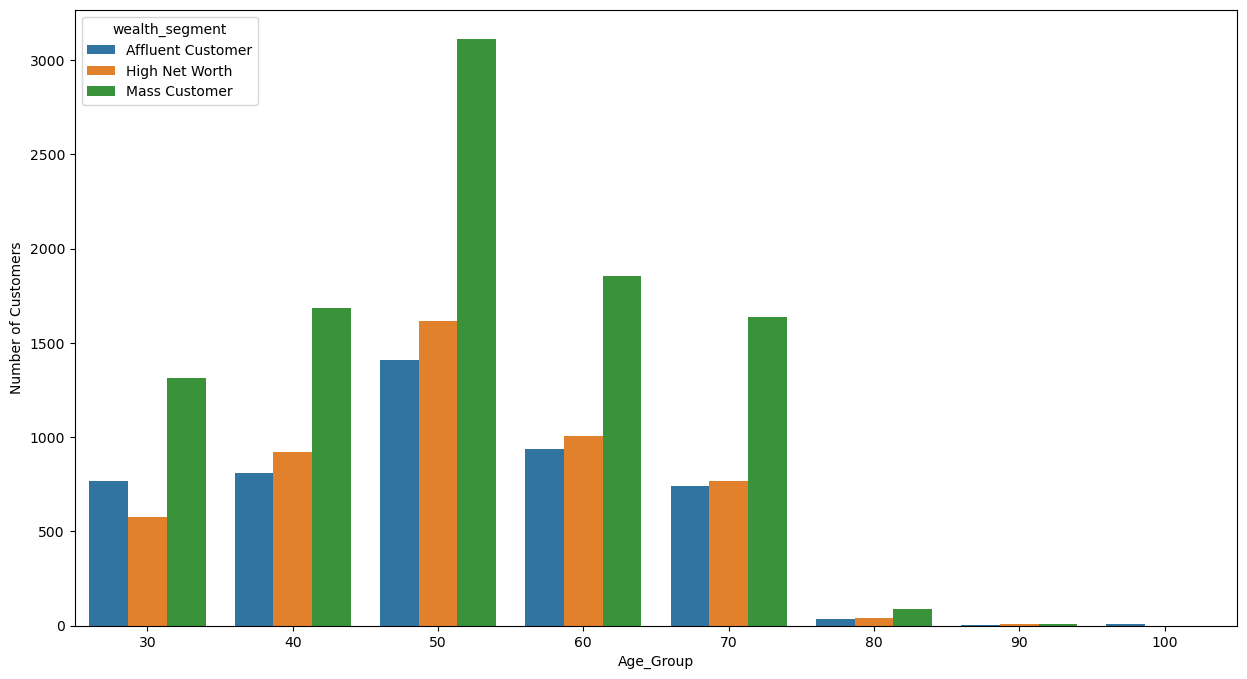

In [79]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age_Group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_new)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Wealth Segmentation by Age Group')
plt.show()

In [80]:
wealth_age_seg_old = cust_trans_rfm.groupby(['wealth_segment', 'Age_Group']).size().reset_index()

In [82]:
wealth_age_seg_old.rename(columns={0:'Number of Customers'}, inplace=True)
wealth_age_seg_old

,wealth_segment,Age_Group,Number of Customers
0,Affluent Customer,30,767
1,Affluent Customer,40,811
2,Affluent Customer,50,1411
3,Affluent Customer,60,936
4,Affluent Customer,70,743
5,Affluent Customer,80,37
6,Affluent Customer,90,5
7,Affluent Customer,100,10
8,High Net Worth,30,577
9,High Net Worth,40,919


TypeError: 'str' object is not callable

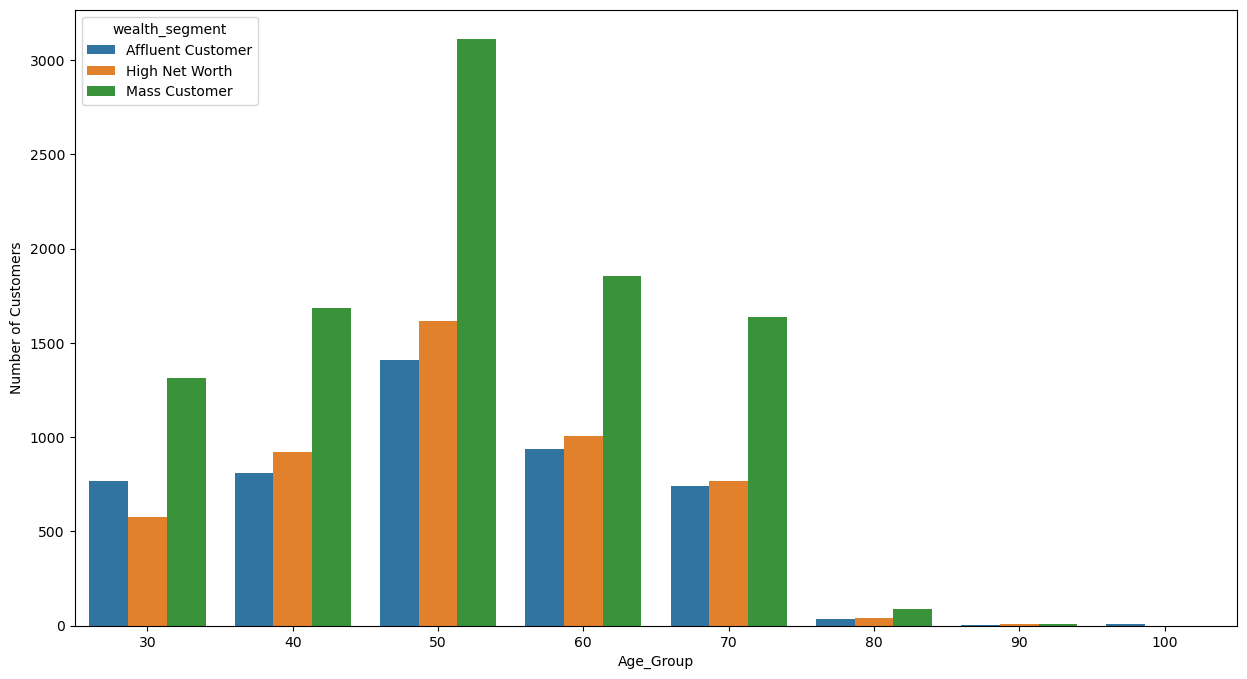

In [83]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age_Group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_old)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Wealth Segmentation by Age Group')
plt.show()

In [85]:
#3.5. Car owner across each State
#The customer base of the automobile bike company lies in New South Wales, Queensland and Victoria, Australia.
#In New South Wales (NSW) it seems there is a greater amount of people who donot own a car. In Victoria (VIC) the proportion is evenly split. However in Queensland (QLD) there are relatively more people who own the car.

In [86]:
cust_addr_info = pd.read_csv('CustomerAddressCleaned.csv')

In [88]:
cust_trans_addr = pd.merge(cust_addr_info, cust_trans_rfm, left_on='customer_id', right_on='customer_id', how='inner')

In [89]:
print("RFM table Records count : {}\nAddress Table Records count :{}".format(cust_trans_rfm.shape[0] ,cust_addr_info.shape[0]))

RFM table Records count : 19354
Address Table Records count :3999


In [90]:
state_car_owners = cust_trans_addr[['state' , 'owns_car' , 'customer_id']].drop_duplicates().groupby(['state', 'owns_car']).size().reset_index()

In [95]:
state_car_owners.rename(columns={0:'Number of Customers'}, inplace=True)
state_car_owners

,state,owns_car,Number of Customers
0,NSW,No,889
1,NSW,Yes,935
2,QLD,No,365
3,QLD,Yes,363
4,VIC,No,435
5,VIC,Yes,425


TypeError: 'str' object is not callable

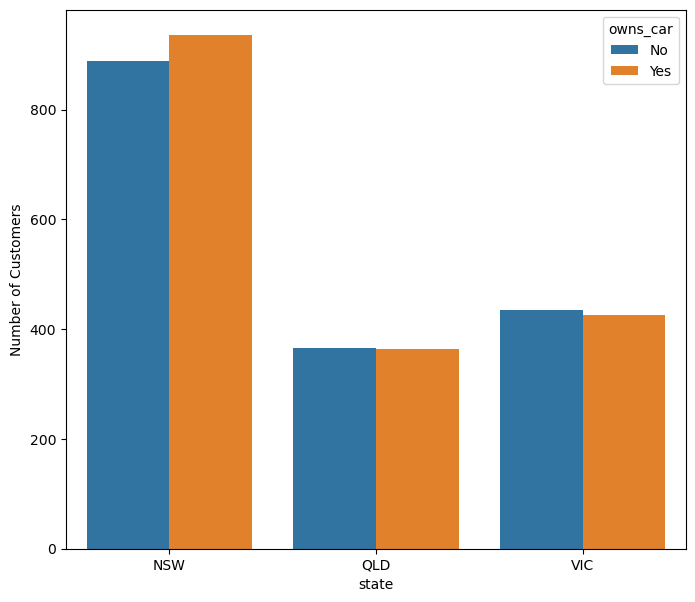

In [96]:
plt.figure(figsize=(8,7))
sns.barplot(x='state', y='Number of Customers' , hue='owns_car', data=state_car_owners)
plt.xlabel('States')
plt.ylabel('Number of Customers')
plt.title('Number of Customers who own a car')
plt.show()

In [97]:
#4. RFM Analysis Scatter Plots
#4.1. Recency vs Monetary
#The chart shows that customers who purchased recently generated more revenue than customers 
#who visited long time ago. Customers from recent past (50-100) days generated a moderate revenue. 
#Customers who visited 200 days ago generated a low revenue.

TypeError: 'str' object is not callable

<Figure size 800x700 with 0 Axes>

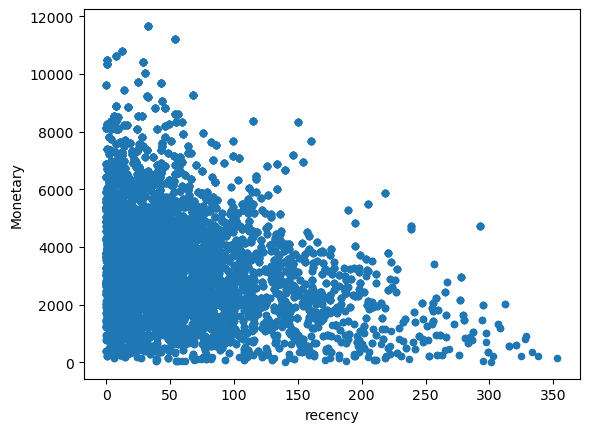

In [99]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='recency' , y='Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

In [100]:
#4.2 Frequency vs Monetary
#Customers classified as "Platinum Custoers" , "Very Loyal" and "Becoming Loyal" visit frequently, 
#which correlated with increased revenue for the business.

TypeError: 'str' object is not callable

<Figure size 800x700 with 0 Axes>

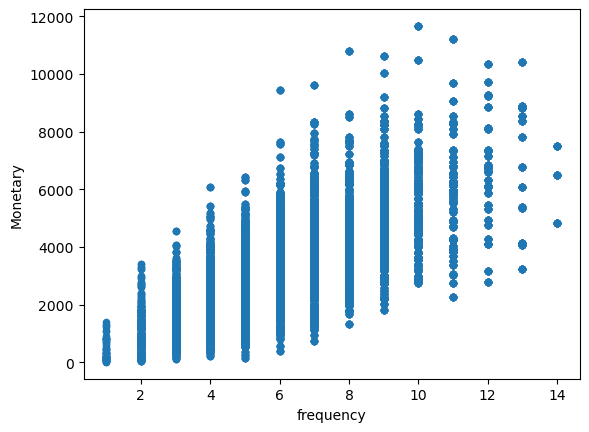

In [101]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='frequency' , y='Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

In [102]:
#5. Customer Segment Distribution
#Finally we can plot the Number of Customers present under a Customer Segment.

# Calculating the number of unique customers under a customer title.

cust_per_title = cust_trans_rfm[['detail_cust_title', 'customer_id','rank']].drop_duplicates().groupby(
    ['detail_cust_title','rank']).size().reset_index().sort_values('rank')
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
7,Platinum Customer,1,164
10,Very Loyal,2,181
1,Becoming Loyal,3,344
9,Recent Customer,4,357
8,Potential Customer,5,340
4,Late Bloomer,6,332
5,Loosing Customer,7,333
3,High Risk Customer,8,371
0,Almost Lost Customer,9,315
2,Evasive Customer,10,388


TypeError: 'str' object is not callable

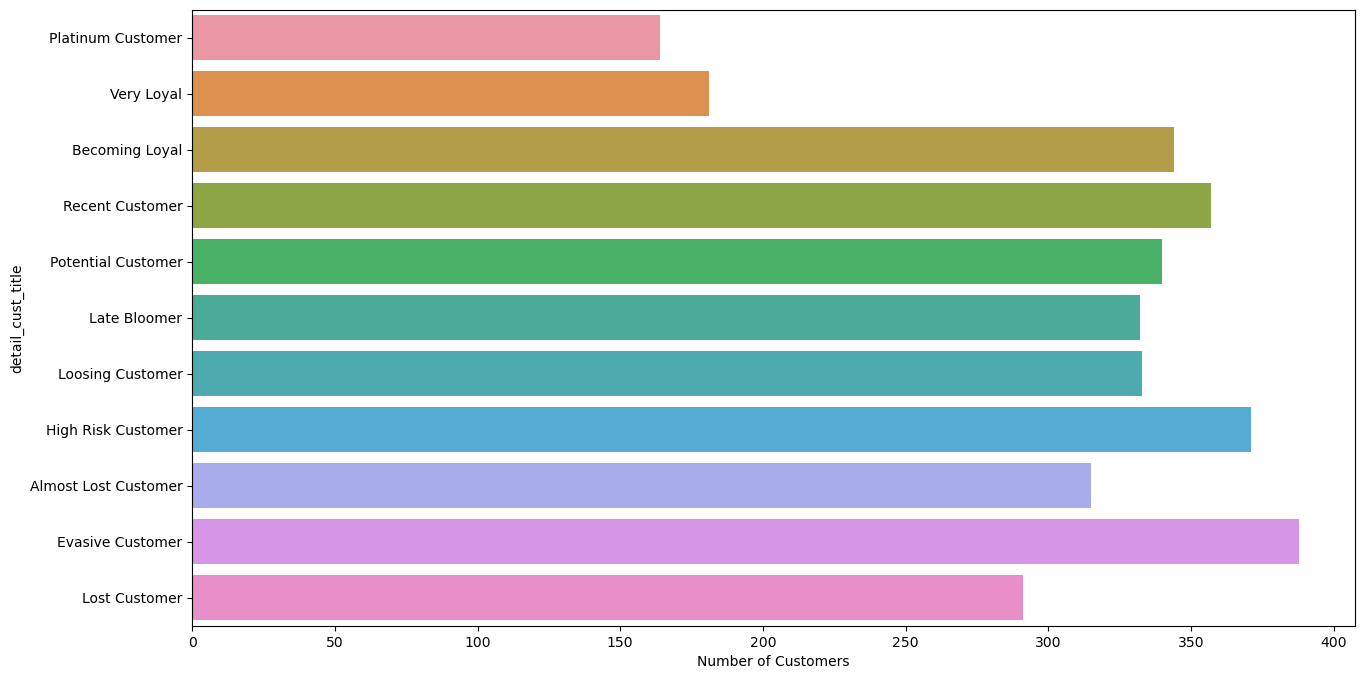

In [103]:
# Plotting the Number of Customers

plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()